# K-means

Regina Ceballos Mondragón

147663

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from sklearn.ensemble import RandomForestClassifier as rforest
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import seaborn
%matplotlib inline

## Data download

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None)
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[1:9]], df[[0]], train_size=0.75)
X_train, X_test, Y_train, Y_test = np.asarray(X_train), np.asarray(X_test), np.asarray(Y_train), np.asarray(Y_test)
df.head()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Random Forest

In [3]:
cfor = rforest()
cfor.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [4]:
predfor = cfor.predict(X_test)
cmfor = cm(predfor, Y_test)
cfor.score(X_test, Y_test)

0.50909090909090904

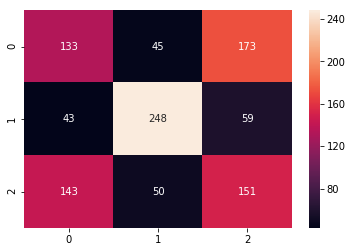

In [5]:
seaborn.heatmap(cmfor, annot=True, fmt="d")

In [6]:
print(classification_report(predfor, Y_test))

             precision    recall  f1-score   support

          F       0.42      0.38      0.40       351
          I       0.72      0.71      0.72       350
          M       0.39      0.44      0.42       344

avg / total       0.51      0.51      0.51      1045



## K-means clustering

In [7]:
k = 5
km = KMeans(n_clusters=k)
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
I = km.labels_
cfork = rforest()
for j in range(k):
    Xtr, Ytr = X_train[I == j], Y_train[I == j]
    cfork.fit(Xtr, Ytr)
    sfork = cfork.score(X_test, Y_test)
    predfork = cfork.predict(X_test)
    cmfork = cm(predfork, Y_test)
    print cmfork, sfork
print(classification_report(predfork, Y_test))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[[172  44 211]
 [ 65 251  83]
 [ 82  48  89]] 0.48995215311
[[156 102 190]
 [ 31  78  35]
 [132 163 158]] 0.375119617225
[[186 121 206]
 [ 26  39  28]
 [107 183 149]] 0.357894736842
[[139 116 185]
 [ 32 137  48]
 [148  90 150]] 0.407655502392
[[164  37 171]
 [ 60 241  73]
 [ 95  65 139]] 0.520574162679
             precision    recall  f1-score   support

          F       0.51      0.44      0.47       372
          I       0.70      0.64      0.67       374
          M       0.36      0.46      0.41       299

avg / total       0.54      0.52      0.53      1045



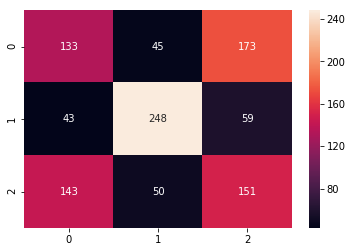

In [10]:
seaborn.heatmap(cmfor, annot=True, fmt="d")

For the classification without the K-means preprocessing, all of the metrics were around 51%. With the preprocesing they are now all above 52%. It is clear that the K-means processing improves the metrics for this data.